# Projet Python WordCloud Henri et Vincent

## 1. Introduction

### 1.1. Présentation du projet

L’objectif est d’**observer l’évolution de la crise du coronavirus à travers l’analyse des discours du président Macron**. Pour que cette analyse soit vraiment la plus précise et la moins biaisée possible, nous avons choisis de sélectionner uniquement les discours sous la forme d'adresse aux Français et qui sont recensés sur le site de l'Elysée. Ces discours ont l'avantage d'avoir le même public visé, la même forme et même le même lieu. Nous avons donc un corpus de 9 discours entre le 12 Mars 2020 et le 9 Novembre 2021. Ces textes devraient donc être particulièrement pertinent pour observer l'évolution de la crise. Pour mener notre analyse il nous faudra **extraire les mots clés** de ces discours (text clouds). Pour cela, nous allons coder en Python un WordCloud qui permet **d'afficher de façon graphique les mots clés de chaque discours**. L'objectif est d'arriver au terme de ce projet à quelque chose de cette forme.

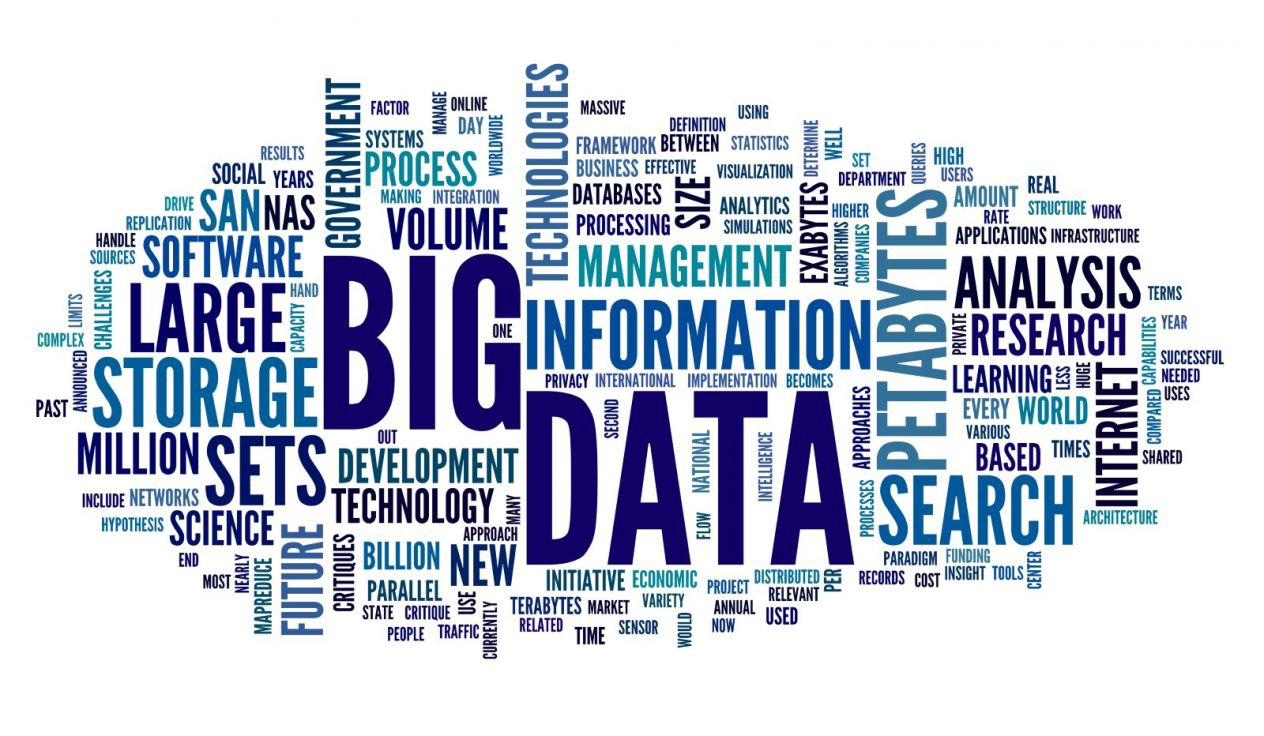

Avec un WordCloud pour les différents discours d'Emmanuel Macron depuis le début de la crise, nous serons capable de voir **l'évolution de sa stratégie de communication**.

### 1.2. Méthodologie

Il y a **plusieurs méthodes pour coder un WordCloud** i.e. un algorithme qui extrait les mots clés d’un texte et les représente. 

La plus simple est de faire **un ranking des mots utilisés en fonction de leur fréquence d’apparition**. Cette méthode naïve a pour défaut de ne pas faire la différence entre des mots différents désignant pourtant la même chose. Par exemple, cette méthode ne fera pas la différence entre "français" et "française". Ces deux mots seront comptés comme différents car ils ont des accords différents. Pourtant, ils désignent la même idée : l'auteur du texte s'adresse aux Français. Pour qu'un WordCloud soit pertinent, il faudrait que, dans une telle situation, le programme prenne en compte que le mot "français" est apparu deux fois. Pour parvenir à cela, il nous faudra ajouter à la méthode de ranking simple **des méthodes de racinisation**. 

En outre, le ranking simple présente aussi l’inconvénient d’accorder **une importance démesurée aux petits mots** (« de », « et », etc). On peut les supprimer en implémentant des "**stopwords**", mais le WordCloud ne sera toujours pas réellement pertinent, dans la mesure où, s'il y a bien des mots qui seront des stopwords peu importe le texte (comme, par exemple, les déterminants), d'autres ne le seront que dans certains contextes. Prenons par exemple le verbe être à l'infinitif. Dans un texte où des consignes sont données, il peut être énormément présent à travers des formulations comme 'il faudra être particulièrement vigilant à ...'. Dans ce premier cas il n'est pas pertinent de le faire apparaitre sur le WordCloud. Par contre dans un texte philosophique sur l'Être, le mot apparaitra aussi souvent mais il est pertinent de le mettre sur le WordCloud. Il faut donc **pondérer les fréquences d’apparition des mots en fonction d’une moyenne de leur apparition dans un corpus de textes représentatifs de l’usage usuel de ces mots**. C’est **la méthode TF-IDF** que nous utiliserons pour affiner notre WordCloud.

## 2. Les méthodes d'analyse

### 2.1. Une première méthode : une approche naïve d'un texte non nettoyé, non racinisé.

Il faut tout d'abord **enregistrer le fichier au format .txt dans le même document que le fichier au format .ipynb**.

La **première méthode** est très naïve. On construit le WordCloud à partir d'un dictionnaire construit avec les mots d'un texte que l'on détermine à l'aide de **la fonction re.findall de la bibliothèque re**, qui permet de manipuler des expressions régulières en python, et d'une représentation graphique 

Pour la représentation graphique, il faut **importer les bibliothèques wordcloud** (si elle n'est pas installée, il faut se rendre dans Anaconda pour la rentrer dans l'environnement) **et matplotlib**. **La fonction generate_from_frequencies** de cette bibliothèque permet d'avoir une représentation graphique à partir d'un dictionnaire avec les mots en clés et leur fréquence dans le texte en valeur. 

In [1]:
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

On obtient ainsi les fonctions suivantes :

- la fonction ***dictionary1*** prend en appel un nom (au format str) de discours enregistré au format txt dans le même document que ce notebook et retourne le dictionnaire qui contient les mots du texte en clés et leur fréquence en valeur.


- la fonction ***wordcloud*** prend en appel un nom de discours et une méthode de dictionnaire (ici, la méthode dictionary1) et renvoie le WordCloud obtenu à partir des fréquences de cette méthode.

**La fonction re.findall**  va chercher dans une chaîne de caractères (ici, le texte) les suites de caractères (les mots) vérifiant une certaine contrainte (cela permet de ne pas avoir à se soucier de la ponctuation).

Voici le WordCloud obtenu avec la première méthode avec le discours de Macron du 12 mars 2020


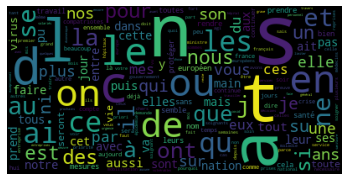

In [2]:
def dictionary1(speech_name):
    
    # ce passage permet d'ouvrir le texte au format txt et de le rentrer dans speech en tant que chaîne de caractère
    with open(f'./{speech_name}.txt','r', encoding="utf-8") as f:
        speech = f.read()
        speech = speech.lower()
        
    # on commence la construction du dictionnaire qui contient les mots en clés et leur fréquence dans le texte en valeur
    dictionary = {}
    for word in re.findall(r'\b[A-zÀ-ù]+\b', speech): 
        if word not in dictionary:
             dictionary[word] = len(re.findall(word,speech))
    return dictionary

def wordcloud(speech_name,dictionary):
    wordcloud = WordCloud(max_font_size = 100)
    dictionary_aux = lambda x: dictionary(x)
    wordcloud.generate_from_frequencies(dictionary_aux(speech_name))
    plt.figure()
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    
print('Voici le WordCloud obtenu avec la première méthode avec le discours de Macron du 12 mars 2020')
wordcloud('discoursmacron12mars2020', dictionary1)

In [3]:
print('Et le dictionnaire associé :')
print(dictionary1('discoursmacron12mars2020'))

Et le dictionnaire associé :
{'françaises': 1, 'français': 7, 'mes': 32, 'chers': 6, 'compatriotes': 10, 'depuis': 6, 'quelques': 4, 'semaines': 8, 'notre': 25, 'pays': 3, 'fait': 7, 'face': 4, 'à': 103, 'la': 115, 'propagation': 3, 'd': 585, 'un': 65, 'virus': 13, 'le': 349, 'covid': 4, 'qui': 47, 'a': 1084, 'touché': 2, 'plusieurs': 6, 'milliers': 2, 'de': 285, 'nos': 42, 'j': 106, 'ai': 182, 'bien': 11, 'entendu': 1, 'ce': 175, 'soir': 9, 'avant': 4, 'toute': 13, 'chose': 4, 'une': 37, 'pensée': 1, 'émue': 1, 'et': 138, 'chaleureuse': 1, 'pour': 76, 'les': 175, 'familles': 2, 'proches': 3, 'victimes': 1, 'cette': 19, 'épidémie': 5, 'affecte': 1, 'tous': 22, 'continents': 1, 'frappe': 2, 'européens': 6, 'est': 71, 'plus': 38, 'grave': 4, 'crise': 10, 'sanitaire': 4, 'qu': 169, 'ait': 18, 'connu': 1, 'france': 10, 'siècle': 1, 'dans': 25, 'l': 842, 'immense': 2, 'majorité': 1, 'des': 77, 'cas': 6, 'sans': 12, 'danger': 1, 'mais': 20, 'peut': 3, 'avoir': 2, 'conséquences': 1, 'très': 3

**Dès à présent nous utiliserons le discours du 12 mars 2020 pour tester l'efficacité de notre WordCloud.**

On constate que **le WordCloud obtenu avec la première méthode est très mauvais**. En effet, il ne met aucunement en valeur les mots clés du discours car il accorde **une importance démesurée aux petits mots** très fréquents dans la langue française ("on", "a", "le"...). 

On peut néanmoins calculer le coût algorithmique de cette méthode. On importe pour cela **le package time**.

Nous le ferons dorénavant pour toutes les versions de notre WordCloud.

In [4]:
import time

debut = time.time()
dictionary_test = dictionary1('discoursmacron12mars2020') 
fin = time.time()
print(f'Le coût algorithmique de la première méthode est de {round(1000 * ((fin - debut) / len(dictionary_test)),3)} secondes pour 1000 mots')

Le coût algorithmique de la première méthode est de 0.116 secondes pour 1000 mots


### 2.2. Une deuxième méthode : une approche trop rapide qui brûle les étapes.

Après quelques recherches, nous nous rendons compte qu'**il manquait plusieurs étapes nécessaires** à notre première méthode : 

- **le nettoyage du texte** avec le retrait des stopwords, ces petits mots parasites qui prennent une importance démesurée alors qu'ils n'apportent pas de signification particulière,


- **la racinisation du texte** qui permet de regrouper les mots par origine sémantique afin d'accorder une importance plus importante au sens dans la construction du WordCloud.

Il faut donc d'abord nettoyer et raciniser le texte avant de l'exploiter dans un dictionnaire pour étudier la fréquence des termes. Nous allons donc créer une autre fonction, **cleaner_text2** ("2" pour la deuxième méthode), qui prend en appel le nom d'un texte enregistré au format txt et sort le texte nettoyé et racinisé en format liste. 

Pour cela, **nous importons les bibliothèques Python qui nous semblent nécessaires**, un petit peu à tâtons, pour réaliser notre fonction : **le set de stopwords français** qui sont les petits mots peu pertinents de la langue française (par exemple les auxiliaires et leur conjuguaison, les pronoms, les articles etc.) et les fonctions de tokenisation (**nltk.word_tokenize**, pour mettre le texte en format list) et de racinisation (**nltk.WordNetLemmatizer**, pour regrouper ensuite les mots par racine commune lors de la création du dictionnaire) du **package nltk**.

In [5]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('wordnet')

stop_words = set(stopwords.words('french'))

def cleaner_text2(speech):
    with open(f'./{speech}.txt', 'r', encoding="utf-8") as f:
        speech = f.read()
    
    speech = speech.lower()
    pattern = r'[^a-zA-z0-9\s]'
    speech = re.sub(pattern, '', speech)
    speech_tokens = nltk.word_tokenize(speech)
    words = [w for w in speech_tokens if not w in stop_words]
    words_lemmatize = nltk.WordNetLemmatizer()
    
    return ([words_lemmatize.lemmatize(t) for t in words])

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/henrifabre/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/henrifabre/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/henrifabre/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


On affiche ici les premières lignes de notre discours, traitées avec la fonction cleaner_text2.

In [6]:
cleaner_text2('discoursmacron12mars2020')[:10]

['franaises',
 'franais',
 'chers',
 'compatriotes',
 'depuis',
 'quelques',
 'semaines',
 'pay',
 'fait',
 'face']

On voit bien que **ce traitement de texte n'est pas idéal** (le mot "pays" devient "pay") et les caractères spéciaux n'apparaissent pas (comme le "ç" de "français"), mais voyons quand même ce que ça donne dans un WordCloud.

Pour réaliser le WordCloud, on fait comme pour la première méthode en **créant un dictionnaire** qui contient les mots du discours en clés et leur fréquence en valeurs. La fonction dictionary va ainsi prendre en appel un texte et une méthode de traitement de texte pour sortir **le dictionnaire des fréquences** obtenu à partir du texte traité avec cette méthode. Ensuite, **on redéfinit la fonction WordCloud** pour qu'elle prenne en compte la méthode utilisée.

Voici le WordCloud obtenu avec la deuxième méthode :


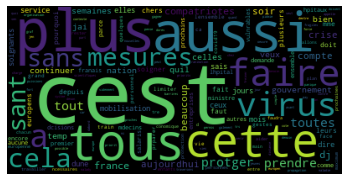

In [7]:


def dictionary(speech_name, cleaner_text): # on choisit la fonction de nettoyage et racinisation cleaner_text
    dictionary = {}
    cleaner_text_aux = lambda x: cleaner_text(x)
    speech = cleaner_text_aux(speech_name)
    for word in speech:
        frequency = 0
        if word not in dictionary:
            for word_aux in speech:
                if word == word_aux: # à un mot, Python associe un numéro, donc il peut les comparer
                    frequency += 1
            dictionary[word] = frequency
    return dictionary

def wordcloud(speech_name, cleaner_text_method):
    wordcloud = WordCloud(max_font_size = 100)
    wordcloud.generate_from_frequencies(dict(dictionary(speech_name, cleaner_text_method)))
    plt.figure()
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

print('Voici le WordCloud obtenu avec la deuxième méthode :')
wordcloud('discoursmacron12mars2020', cleaner_text2)

Ce WordCloud révèle **les nombreux défauts de notre première fonction qui nettoie et racinise le texte**.

En effet, les apostrophes et les accents ont disparu et certains mots sont sous forme de racine, ce qui crée **des mots inexistants dans le dictionnaire** (comme "sant" ou "cest") : ce n'est pas ce que nous voulons. 


On remarque bien que **cette fonction de nettoyage et racinisation cleaner_text2 n'est pas bonne** !

Elle nous a cependant permis de **nous rendre compte des difficultés que nous allions devoir surmonter** pour arriver à une liste de mots exploitables. Nous comprenons aussi que les lemmatizer fournis par le package nltk sont loin d'être parfaits et hâchent beaucoup de mots un peu aléatoirement. **Nous décidons alors de mettre de côté la phase de racinisation pour plus tard pour nous concentrer d'abord sur le nettoyage** dans une troisième méthode.

Mais d'abord, voici **le coût algorithmique de la deuxième méthode**. Cette méthode prend plus de temps que la première, ce qui est normal comme elle nettoie et racinise le texte.

In [8]:
debut = time.time()
dictionary_test = dictionary('discoursmacron12mars2020', cleaner_text2) 
fin = time.time()
print(f'Le coût algorithmique de la deuxième méthode est de {round(1000 * ((fin - debut) / len(dictionary_test)),3)} secondes pour 1000 mots')

Le coût algorithmique de la deuxième méthode est de 0.137 secondes pour 1000 mots


### 2.3. Troisième méthode : amélioration du nettoyage.

**La première chose à corriger pour le nettoyage est la conservation des caractères spéciaux indispensables à la compréhension de la langue française**. Typiquement, nous ne voulons pas que le mot "français" devienne "francais" après avoir été nettoyé. **C'est le pattern qu'il faut améliorer**, puisqu'il donne l'instruction de ne conserver que les lettres minuscules ("a-z"), majuscules ("A-z") et les espaces ("\s").

Posons alors un nouveau pattern tel que :

In [9]:
pattern = r"[^\wéèçàù\s'-]" # veuillez bien exécuter cette commande s'il vous plaît.

Désormais, grâce à l'importation de la bibliothèque "re", le programme a toujours l'instruction de conserver les lettres, cette fois travers la commande "\w", **mais aussi tous les caractères spéciaux** ("éèçàù'-") !

Ensuite, comme nous l'avons déjà vu, pour avoir une liste de mots exploitable, il faut **enlever les mots trop courants afin d'obtenir un WorldCloud pertinent**. Nous avons déjà **les stopwords de la bibliothèque nltk** et nous ajoutons ceux qui nous semblent manquer, comme ci-dessous.

In [10]:
stop_words.add('cela')
stop_words.add("l'")
stop_words.add("d'")
stop_words.add("c'")
stop_words.add("m'")
stop_words.add("n'")
stop_words.add("s'")
stop_words.add("t'")
stop_words.add("j'")
stop_words.add("qu'")
stop_words.add("a")

# Nous rajoutons les mots "aussi" et "cette" aux stopwords car nous nous sommes rendus compte que c'était un tic de language de E. Macron.
# Il commence de nombreuses phrases par "aussi" et parle tout le temps de la cris comme "cette crise", cela faussait les WordCloud
stop_words.add("aussi")
stop_words.add("cette")

Des recherches effectuées nous indiquent ensuite que **la bibliothèque SpaCy représente de gros volumes de données pour la langue française**. Nous chargeons alors SpaCy sur notre ordinateur et remplaçons notre commande de tokenisation par une commande plus direct (**la fonction nlp()**). Cela peut prendre un petit peu de temps...

In [11]:
import sys
!{sys.executable} -m pip install spacy
!{sys.executable} -m spacy download fr_core_news_sm
import fr_core_news_sm
nlp = fr_core_news_sm.load()

     |████████████████████████████████| 16.3 MB 5.5 MB/s eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_sm')


In [12]:
# Fonction auxiliaire :

def speech_token(sentence):
    doc = nlp(sentence)
    return[X.text for X in doc]

# Fonction principale :

def cleaner_text3(speech_name): 
    
    with open(f'./{speech_name}.txt','r', encoding="utf-8") as f:
        speech = f.read()
      
    # on tokénise le texte
    speech = speech.lower()
    speech = re.sub(pattern,'', speech) # la fonction r.sub remplace ce qui n'est pas dans le pattern par des espaces
    speech = speech_token(speech)
    
    # on enlève les stopwords du texte
    cleaner_text = []
    for token in speech:
        if token not in stop_words:
            cleaner_text.append(token)
    
    return cleaner_text

print('Voilà un exemple des premières lignes du discours nettoyé, non racinisé :')
cleaner_text3('discoursmacron12mars2020')[:10]

Voilà un exemple des premières lignes du discours nettoyé, non racinisé :


['françaises',
 'français',
 'chers',
 'compatriotes',
 '\n\n\n',
 'depuis',
 'quelques',
 'semaines',
 'pays',
 'fait']

A ce stade, **on prend conscience d'un nouveau problème**. 

Certains espaces sont remplacés (on ne sait d'ailleurs toujours pas pourquoi...) par "\n". 

Il faut alors **créer une fonction qui remplacera ces caractères là dans le texte par ce qu'on veut**. Ce sera **la fonction replace_caractere**.

In [13]:
def replace_caractere(speech):
    s = list(speech)
    for i in range(len(s)):
        if  s[i] == "’":
            s[i] = "'"
    for j in range(len(s)):
        if s[j] == "\n" or s[j] == "\t":
            s[j] = ' '
    s = "".join(s)
    return s

La fonction replace_caractere transforme la phrase "les français\naiment le sport" en:

In [14]:
replace_caractere('les Français\naiment le sport')

'les Français aiment le sport'

On redéfinit une nouvelle fonction cleaner_text3 qui prend en compte la fonction intermédiaire replace_caractere.

In [15]:
def cleaner_text3(speech_name): 
    
    with open(f'./{speech_name}.txt','r', encoding="utf-8") as f:
        text = f.read()
        
    text = text.lower()
    text = replace_caractere(text)
    text = re.sub(pattern, '', text)
    text = speech_token(text)
    
    cleaner_text = []
    for token in text:
        if token not in stop_words:
            cleaner_text.append(token)
    
    return cleaner_text

print('Voilà le même exemple de texte nettoyé, non racinisé mais dont on a réalisé un ajustement avec la fonction replace_caractere :')
cleaner_text3('discoursmacron12mars2020')[:10]

Voilà le même exemple de texte nettoyé, non racinisé mais dont on a réalisé un ajustement avec la fonction replace_caractere :


['françaises',
 'français',
 'chers',
 'compatriotes',
 '  ',
 'depuis',
 'quelques',
 'semaines',
 'pays',
 'fait']

**La fonction cleaner_text3 fait bien ce que nous voulions au début !** En prenant en appel un texte, elle renvoie une liste de mots exploitables et pertinents. Maintenant que nous avons un liste de mots exploitables, nous devrions avoir un bien meilleur WordCloud avec **la fonction wordcloud**.

Voici le WordCloud obtenu avec la troisième méthode :


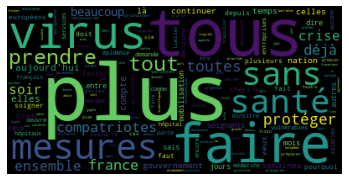

In [16]:
print('Voici le WordCloud obtenu avec la troisième méthode :')
wordcloud('discoursmacron12mars2020', cleaner_text3)

En effet, **le WordCloud est bien plus joli** et ressemble déjà beaucoup plus à ce que nous pouvons voir sur internet. Mais des problèmes persistent : les mots de la même famille ne sont pas comptabilisés ensemble et donc apparaissent plusieurs fois (par exemple tous et toutes devraient n'être considérés comme un seul élément pour que le wordcloud soit vraiment pertinent). **Le WordCloud que nous avons obtenu n'est donc pas totalement représentatif du texte en question**. 

Par exemple, dans la phrase "Mon père est confiné, ma mère est confinée et mes frères sont confinés", la méthode que nous avons attribuera à "est" le score le plus important, alors qu'il est flagrant que c'est ici "confiné" qui devrait l'avoir. 

Nous devons donc faire en sorte de **rassembler les mots désignants le même objet ou la même question** sous un seul. Pour cela, **il faut raciniser efficacement le texte**.

Mais d'abord, réalisons la rapide analye du coût algorithmique de ce programme. Il est  plus lent que les précédents programmes : cela est dû à la fonction replace_caractere qui parcourt le texte mot par mot.

In [17]:
debut = time.time()
dictionary_test = dictionary('discoursmacron12mars2020', cleaner_text3) 
fin = time.time()
print(f'Le coût algorithmique de la troisième méthode est de {round(1000 * ((fin - debut) / len(dictionary_test)),3)} secondes pour 1000 mots')

Le coût algorithmique de la troisième méthode est de 0.581 secondes pour 1000 mots


### 2.4. Quatrième méthode : l'ajout de la racinisation du texte.

Dans le premier essai, nous avions essayé de raciniser les mots de façon un petit peu aléatoire avec un Lemmatizer classique de la bibliothèque nltk. Mais après quelques recherches, **nous avons choisis d'utiliser un stemmer plus adapté à la langue française**. A la différence du Lemmatizer, le stemmer va seulement raciniser les mots. 

In [18]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer(language='french')

Créons rapidement une fonction qui reprend cleaner_text3 et lui applique le stemmer.

In [19]:
# Fonction auxiliaire :
def speech_stem(sentence):
    sentence_2 = ' '.join(sentence)
    doc = nlp(sentence_2)
    return [stemmer.stem(X.text) for X in doc]

# Fonction principale :
def cleaner_text4(speech):
    clean_speech_stem = cleaner_text3(speech)
    clean_speech_stem = speech_stem(clean_speech_stem)
    return clean_speech_stem

Voici ce que donne notre fonction cleaner_text4 qui nettoie (avec la fonction cleaner_text3) et racinise la texte pour les premières lignes du discours :

In [20]:
cleaner_text4('discoursmacron12mars2020')[:10]

['français',
 'franc',
 'cher',
 'compatriot',
 '   ',
 'depuis',
 'quelqu',
 'semain',
 'pay',
 'fait']

**Les mots sont racinisés !** Cependant la racinisation n'est pas vraimenrt satisfaisante pour autant puisque français et française ne sont pas considérés comme ayant la même racine et il en sera de même pour tous ('tou') et toutes ('tout'). **Cependant nous n'arrivons pas à faire mieux**

Bien entendu, **nous ne voulons pas de racines dans notre WordCloud**. C'est moche et parfois incompréhensible. Pour qu'un WordCloud soit parfait, il faudrait réussir à mettre tous les verbes à l'infinitif et tous les adjectifs au masculin singulier. Certains algorithme le font, comme l'algorithme de Porter, mais il est beaucoup trop compliqué d'en construire un en un temps si court. La solution que nous avons choisi, plus simple, est d'**attribuer à chaque racine son origine la plus fréquente**.

La première étape pour cela est de **créer un dictionnaire de dictionnaires**. Chaque racine différente de notre texte sera une clé de ce dictionnaire et constituera en elle même un dictionnaire dont les clés seront les différentes origines de cette racine et les valeurs attribuées le nombre de fois où elles apparaissent. Le programme sera tel que présenté ci-dessous. 

Un léger problème concernant la longueur de la liste racinisée en comparaison à la liste non racinisée nous pousse à enlever de potentiels caractères "parasites" qui faussent le dictionnaire.

In [21]:
def dictionary_of_dictionaries(speech, cleaner_text):
    cleaner_text_aux = lambda x: cleaner_text(x)
    words = cleaner_text3(speech)
    words_stem = cleaner_text_aux(speech)
    clean_words_stem = []
    caracteres_parasites = ["'","l'"]
    dictionary = {}
    keys_list = []
    final_dictionary = {}
    for i in range(len(words_stem)):
        if words_stem[i] not in caracteres_parasites:
            clean_words_stem.append(words_stem[i])
    for i in range(len(clean_words_stem)):
        if clean_words_stem[i] not in dictionary:
            dictionary[clean_words_stem[i]] = {}
            dictionary[clean_words_stem[i]][words[i]] = 1
        else:
            if words[i] not in dictionary[clean_words_stem[i]]:
                dictionary[clean_words_stem[i]][words[i]] = 1
            else:
                dictionary[clean_words_stem[i]][words[i]] = dictionary[clean_words_stem[i]][words[i]] + 1
    return dictionary

On peut ainsi afficher le dictionnaire de dictionnaires de notre discours.

In [22]:
dictionary_of_dictionaries('discoursmacron12mars2020', cleaner_text4)

{'français': {'françaises': 1, 'française': 1},
 'franc': {'français': 5, 'france': 10},
 'cher': {'chers': 6},
 'compatriot': {'compatriotes': 10},
 '   ': {'  ': 2},
 'depuis': {'depuis': 6},
 'quelqu': {'quelques': 4},
 'semain': {'semaines': 8},
 'pay': {'pays': 3},
 'fait': {'fait': 6, 'faites': 1},
 'fac': {'face': 4},
 'propag': {'propagation': 3, 'propager': 2},
 'virus': {'virus': 13},
 'covid-19': {'covid-19': 4},
 'touch': {'touché': 1, 'touchera': 2, 'touche': 1, 'touchées': 1},
 'plusieur': {'plusieurs': 6},
 'milli': {'milliers': 2},
 'bien': {'bien': 8, 'biens': 2},
 'entendu': {'entendu': 1},
 'soir': {'soir': 9},
 'avant': {'avant': 3},
 'tout': {'toute': 2, 'tout': 11, 'toutes': 11},
 'chos': {'chose': 2, 'choses': 2},
 'pens': {'pensée': 1, 'pensant': 1, 'pense': 2},
 'ému': {'émue': 1},
 'chaleur': {'chaleureuse': 1},
 'famill': {'familles': 2},
 'proch': {'proches': 3},
 'victim': {'victimes': 1},
 'épidem': {'épidémie': 5},
 'affect': {'affecte': 1, 'affectés': 1}

Il faut ensuite **créer un nouveau dictionnaire** pour lequel les clés seront les clés ayant les plus gros scores dans les sous-dictionnaires du premier et la valeurs attribuée à chaque clé sera la somme des valeurs totales du sous-dictionnaire. 

Cela se fait en rajoutant quelques lignes de codes à celui ci-dessus, **nous obtenons alors notre fonction finale de nettoyage et racinisation !**

On recrée ainsi la fonction dictionary  puis on pourra dessiner le WordCloud.

In [23]:
def dictionary(speech, cleaner_text):

    dictionary = dictionary_of_dictionaries(speech, cleaner_text)
    
    keys_list = []
    final_dictionary = {}
    for cle in dictionary:
        keys_list.append(cle)
    for i in range(len(keys_list)):
        inverse_i = [(value, key) for key, value in dictionary[keys_list[i]].items()]
        final_dictionary[max(inverse_i)[1]] = sum(dictionary[keys_list[i]].values())
        
    return final_dictionary

In [24]:
print(dictionary('discoursmacron12mars2020', cleaner_text4))

{'françaises': 2, 'france': 15, 'chers': 6, 'compatriotes': 10, '  ': 2, 'depuis': 6, 'quelques': 4, 'semaines': 8, 'pays': 3, 'fait': 7, 'face': 4, 'propagation': 5, 'virus': 13, 'covid-19': 4, 'touchera': 5, 'plusieurs': 6, 'milliers': 2, 'bien': 10, 'entendu': 1, 'soir': 9, 'avant': 3, 'toutes': 24, 'choses': 4, 'pense': 4, 'émue': 1, 'chaleureuse': 1, 'familles': 2, 'proches': 3, 'victimes': 1, 'épidémie': 5, 'affectés': 2, 'tous': 22, 'continents': 1, 'frappe': 2, 'européens': 13, 'plus': 32, 'graves': 4, 'crise': 10, 'sanitaires': 4, 'connu': 1, 'siècle': 1, 'immense': 2, 'majorité': 1, 'cas': 4, 'sans': 11, 'danger': 1, 'peut': 3, 'avoir': 2, 'conséquences': 1, 'très': 3, 'particulier': 2, 'celles': 9, 'ceux': 7, 'âgés': 2, 'maladies': 8, 'chroniques': 2, 'comme': 5, 'diabète': 1, 'obésité': 1, 'cancer': 1, ' ': 36, 'dures': 2, 'préparer': 5, 'agi': 1, 'personnels': 5, 'hôpitaux': 10, 'médecins': 5, 'infirmiers': 3, 'ambulanciers': 1, 'agents': 1, 'samu': 2, 'ville': 1, 'ensembl

Nous avons donc obtenu **un nouveau dictionnaire avec les mots regroupés par origine sémantique**. Voyons ce que cela nous donne comme WordCloud.

Voici le WordCloud obtenu avec la quatrième méthode :


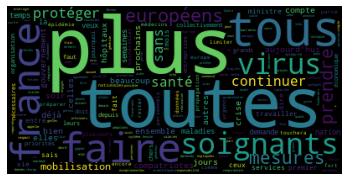

In [25]:
print('Voici le WordCloud obtenu avec la quatrième méthode :')
wordcloud('discoursmacron12mars2020', cleaner_text4)

**Ce WordCloud est plutôt bien réussi !**

Seulement, on observe que des mots comme "celles" et "déjà" ont de l'importance alors qu'ils n'apportent pas de signification particulière au texte. Il faut alors trouver un moyen de diminuer leur importance : **c'est la méthode TF-IDF**.

Mais d'abord, faisons une rapide analyse du coût algorithmique de ce programme. **Il est très lent !** Cela est dû à la fonction qui crée un dictionnaire de dictionnaires.

In [26]:
debut = time.time()
dictionary_test = dictionary('discoursmacron12mars2020', cleaner_text4)
fin = time.time()
print(f'Le coût algorithmique de la quatrième méthode est de {round(1000 * ((fin - debut) / len(dictionary_test)),3)} secondes pour 1000 mots')

Le coût algorithmique de la quatrième méthode est de 1.556 secondes pour 1000 mots


### 2.5. Cinquième méthode : la méthode de pondération TF-IDF.

La méthode TF-IDF permet de **pondérer la fréquence des mots dans le texte par une moyenne représentative de leur usage dans la langue française à partir d'un corpus de texte assez large**.

1) **La partie TF** calcule une fonction croissante de la fréquence du terme de recherche dans le document à l’étude,

2) **la partie IDF** calcule une fonction inversement proportionnelle à la fréquence du terme dans l’ensemble du corpus représentatif de la langue française.

Ainsi, en multipliant les deux composantes, **on obtient un score d’autant plus élevé que le terme est surréprésenté dans un texte par rapport à son utilisation usuelle dans la langue française**.

Soit, la formule suivante : 

$score TF-IDF = term-frequency-text * log( 1 /  term-frequency-corpus )$

Où : 

* term-frequency-text est la fréquence du mot dans le texte (ici, le discours), **la partie TF**.

* term-frequency-corpus est la fréquence du mot dans le corpus (ici, le corpus de discours), pour calculer **la partie IDF**.

Pour le choix du corpus nous avons d'abord pensé prendre un corpus formé des discours de Macron tout le long de la crise. Cela aurait permis d'analyser l'évolution de certains mots dans les discours du Président E. Macron au cours de la crise. Par exemple, l'utilisation du mot "masque" est-elle de plus en plus importante dans les discours au fur et à mesure de la progression de l'épidémie ? Le mot crise est-il toujours aussi employé ? Cependant cela aurait invisibilisé des mots importants puisque le thème est commun à tous ces discours, et donc peu représentatif de l'usage de la langue française. Il n'est pas facile de choisir un corpus qui l'est. Nous avons donc décidé de rester dans le domaine politique et de prendre un corpus composé des voeux prononcés par le président pour le nouvel an et ce sur plusieurs années (Macron 2018, 2019, 2020, Hollande 2013, 2016, Sarkozy 2008, 2012, Chirac 2006, 2007 et Mitterand 1991, 1992). Nous y supprimons le début et la fin qui se repètent.

Une fois le corpus choisit on définit  les fonctions :

* **number_key_words** qui calcule le nombre de clés dans un dictionnaire.

* **tf_dictionary** qui prend en appel un mot du discours, le dictionnaire du discours, le nombre de clés dans ce dictionnaire et retourne la fréquence de son utilisation dans le discours,

* **idf_dictionary** qui prend en appel un mot, le dictionnaire du corpus de discours, le nombre de clés dans ce dictionnaire et retourne la fréquence de son utilisation dans le corpus de discours,

* **score_tfidf_dictionary** qui prend en appel un mot, les dictionnaires du discours dont on veut tracer le WordCloud et du corpus de discours, les nombres de clés dans ces dictionnaires et retourne le score TF-IDF conformément à la formule du mot du discours,

* **tfidf_dictionary** qui prend en appel un texte et le corpus de texte et retourne le dictionnaire élaboré avec la quatrième méthode de nettoyage et de racinisation.

In [27]:
from math import log

def number_key_words(dictionary):
    total = 0
    for key in dictionary:
        total += dictionary.get(key)
    return total

def tf_dictionary(word, text_dictionary, total_key_words_text):
    return text_dictionary[word] / total_key_words_text

def idf_dictionary(word, corpus_dictionary, total_key_words_corpus):
    if word not in corpus_dictionary:
        return 0
    else:
        return log(total_key_words_corpus / corpus_dictionary[word])
    
def score_tfidf_dictionary(word, text_dictionary, total_key_words_text, corpus_dictionary, total_key_words_corpus):
    return tf_dictionary(word, text_dictionary, total_key_words_text) * idf_dictionary(word, corpus_dictionary, total_key_words_corpus)

def tfidf_dictionary(text, corpus):
    final_dictionary = {}
    text_dictionary = dictionary(text, cleaner_text3)
    corpus_dictionary = dictionary(corpus, cleaner_text3)
    total_key_words_text = number_key_words(text_dictionary)
    total_key_words_corpus = number_key_words(corpus_dictionary)
    for word in text_dictionary:
            final_dictionary[word] = score_tfidf_dictionary(word, text_dictionary, total_key_words_text, corpus_dictionary, total_key_words_corpus)
    return final_dictionary



En appliquant notre fonction à notre premier corpus, nous nous sommes rendu compte d'un problème : les mots qui ne sont pas dans le corpus se voient attribuer un score de 0. Il faut donc changer notre corpus, puisque **certains mots comme 'pandémie' ont clairement leur place**. Nous allons donc procéder à un mix de nos premières intuitions, en rajoutant au corpus des discours du nouvel an, le corpus des discours de la pandémie.  

De plus, nous avons d'abord testé la méthode TF-IDF avec la fonction cleaner_text4, mais nous nous sommes rendus compte que de nombreux mots obtenaient un score de 0, ce qui n'était pas normale (D'après notre analyse cela est du au fait qu'un mot comme 'familles' qui apparait une fois dans le discours du 12 mars sera pris dans le dictionnaire avec 'familles' en clé, tandis que dans le corpus, où le mot 'famille' au singulier apparait, le mot 'familles' au pluriel sera pris dans le dictionnaire avec 'famille' en clé. Il n'y aura donc pas de correspondance). Nous avons donc décidé d'utiliser la fonction cleaner_text3 qui a comme désavantage de ne pas raciniser mais dont nous sommes plus sûrs.

On analyse le coût algorithmique de cette nouvelle méthode. Cela peut prendre beaucoup de temps... Comme la méthode TF-IDF doit aussi parcourir un corpus très large, **cela augmente considérablement le coût algorithmique**.

In [29]:
debut0 = time.time()
dictionary_test = tfidf_dictionary('discoursmacron12mars2020', 'corpus')
fin0 = time.time()
coût0 = round(1000 * ((fin0 - debut0) / len(dictionary_test)),3)
print(f'Le coût algorithmique de la cinquième méthode est de {coût0} secondes pour 1000 mots')

Le coût algorithmique de la cinquième méthode est de 21.034 secondes pour 1000 mots


**C'est exceptionnellement long !** 

**Mais le résultat est d'autant plus précis que le corpus est large donc, par conséquent, que l'algorithme est lourd**.

On crée désormais le WordCloud associé à cette nouvelle méthode. Il nous faut, pour cela, définir **une nouvelle fonction wordcloud_tf_idf**.

Voici le WordCloud obtenu avec la cinquième méthode (cela peut prendre un peu de temps...) :


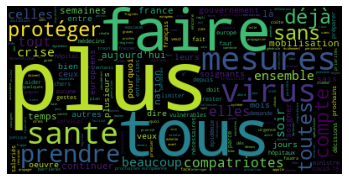

In [30]:
def wordcloud_tf_idf(speech_name):
    wordcloud = WordCloud(max_font_size = 100)
    wordcloud.generate_from_frequencies(dict(tfidf_dictionary(speech_name, 'corpus')))
    plt.figure()
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

print('Voici le WordCloud obtenu avec la cinquième méthode (cela peut prendre un peu de temps...) :')
wordcloud_tf_idf('discoursmacron12mars2020')

**Ce WordCloud est celui que nous voulions au départ !**

On constate que, par rapport à la version précédente, **des mots moins propres à la situation de crise sanitaire comme "faire" et "france" perdent en importance car ils sont pénalisés par la méthode TF-IDF** tandis que d'autres, plus significatifs, comme "hôpitaux" et "soignants" sont valorisés !

## 3. Analyse des résultats et interprétation.

### 3.1. Comparaison avec l’algorithme de A. Mueller et regard critique sur notre programme.

On peut **comparer avec l'algorithme de A. Mueller** (Research Scientist, Columbia Data Science Institute), l'algorithme "officiel" de la bibliothèque wordcloud disponible sur Conda. Voici **la fonction wordcloud_comparison** qui prend en appel le nom d'un texte et ressort le WordCloud de A. Mueller et le notre pour les comparer.


In [31]:
def wordcloud_comparison(speech_name):
    
    # L'algorithme de Mueller génère un WordCloud à partir de la chaîne de caractères "speech"
    debutM = time.time()
    speech = f'./{speech_name}.txt'
    with open(speech, 'r', encoding = 'utf-8') as f:
        speech = f.read()
    
    stopwords_fr_ntlk = nltk.corpus.stopwords.words('french')
    wordcloud = WordCloud(stopwords = stopwords_fr_ntlk, background_color = "white")
    wordcloud.generate(speech)
    plt.imshow(wordcloud)
    plt.axis('off')
    finM = time.time()
    timeM = round(finM - debutM, 3)
    print(f'Le programme de Mueller met {timeM} secondes pour afficher le WordCloud du discours.')
    
    debutBV = time.time()
    wordcloud_tf_idf(speech_name)
    finBV = time.time()
    timeBV = round(finBV - debutBV, 3)
    print(f'Notre programme met {timeBV} secondes pour afficher le WordCloud du discours.')
    print()
    print(f'Le programme de Mueller est donc {round(timeBV / timeM, 2)} fois plus efficace que le notre...')

Le programme de Mueller met 0.368 secondes pour afficher le WordCloud du discours.


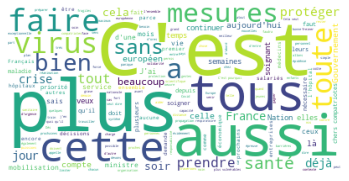

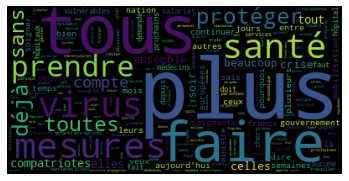

Notre programme met 15.656 secondes pour afficher le WordCloud du discours.

Le programme de Mueller est donc 42.54 fois plus efficace que le notre...


In [32]:
wordcloud_comparison('discoursmacron12mars2020')

Quand on compare avec l'algorithme de Mueller (celui en fond blanc), on se rend compte que **le notre n'est pas mal du tout** ! Nous avons beaucoup moins de petits mots inutiles comme "aussi" et "cette".

Par contre, **l'algorithme de Mueller accorde plus de soin au processus de racinisation par origine sémantique**, "France" ayant, par exemple, conservé sa majuscule ...

Enfin, on constate bien que **nous obtenons un WordCloud plus précis** mais **au prix d'un coût algorithmique démultiplié** !

### 3.2. Analyse de l'évolution des discours du Président de la République pendant l'épidémie de Covid-19.

Comme nous l'avions dit au début, l'objectif de ce projet était d'arriver à **cerner l'évolution de la stratégie de communication d'Emmanuel Macron** tout au long de la crise du Covid-19. Avec cette méthode de création de WordCloud, nous devrions être capable de visualiser clairement sur quels mots il a choisis d'insister et à quel moment. 

Pour cela, jettons un oeil à tous les WordCloud de ses discours.

Voici le WordCloud du discours du Président E. Macron le 12 mars 2020 :


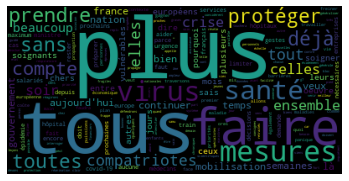

In [33]:
print('Voici le WordCloud du discours du Président E. Macron le 12 mars 2020 :')
wordcloud_tf_idf('discoursmacron12mars2020')


Voici le WordCloud du discours du Président E. Macron le 16 mars 2020 :


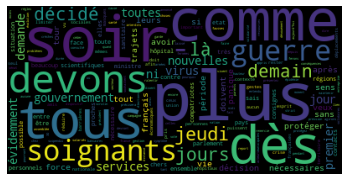

In [34]:
print('Voici le WordCloud du discours du Président E. Macron le 16 mars 2020 :')
wordcloud_tf_idf('discoursmacron16mars2020')

Voici le WordCloud du discours du Président E. Macron le 13 avril 2020 :


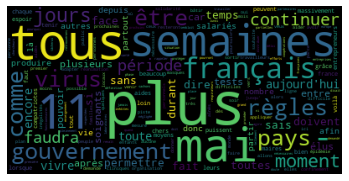

In [35]:
print('Voici le WordCloud du discours du Président E. Macron le 13 avril 2020 :')
wordcloud_tf_idf('discoursmacron13avril2020')

Voici le WordCloud du discours du Président E. Macron le 14 juin 2020 :


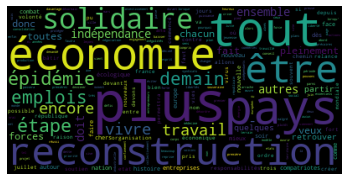

In [36]:
print('Voici le WordCloud du discours du Président E. Macron le 14 juin 2020 :')
wordcloud_tf_idf('discoursmacron14juin2020')

Voici le WordCloud du discours du Président E. Macron le 28 octobre 2020 :


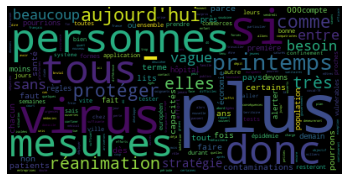

In [37]:
print('Voici le WordCloud du discours du Président E. Macron le 28 octobre 2020 :')
wordcloud_tf_idf('discoursmacron28octobre2020')

Voici le WordCloud du discours du Président E. Macron le 24 novembre 2020 :


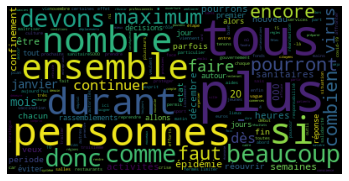

In [38]:
print('Voici le WordCloud du discours du Président E. Macron le 24 novembre 2020 :')
wordcloud_tf_idf('discoursmacron24novembre2020')

Voici le WordCloud du discours du Président E. Macron le 31 mars 2021 :


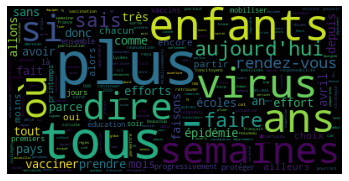

In [39]:
print('Voici le WordCloud du discours du Président E. Macron le 31 mars 2021 :')
wordcloud_tf_idf('discoursmacron31mars2021')

Voici le WordCloud du discours du Président E. Macron le 12 juillet 2021 :


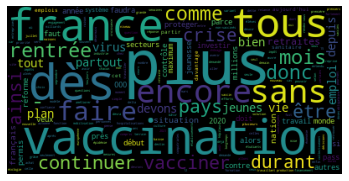

In [40]:
print('Voici le WordCloud du discours du Président E. Macron le 12 juillet 2021 :')
wordcloud_tf_idf('discoursmacron12juillet2021')

Voici le WordCloud du discours du Président E. Macron le 9 novembre 2021 :


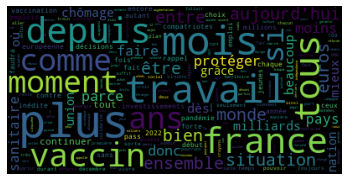

In [41]:
print('Voici le WordCloud du discours du Président E. Macron le 9 novembre 2021 :')
wordcloud_tf_idf('discoursmacron9novembre2021')

Ces WordCloud sont bien représentatifs de ce que nous avons pu entendre !

Au début de la crise, il insiste sur **les risques que représente le virus aux niveaux français et européen** et sur les efforts que va demander la lutte contre le covid. Le discours du 12 mars est ainsi marqué par l'importance des mots "tous" et "ensemble", "plus" qui montre que le président sait que le covid va demander des **efforts constants et importants de tous les citoyens**. Mais il sait aussi que c'est **le secteur de la santé** qui va se trouver en première ligne. On retrouve l'importance des mots "soignants", "santé" et "virus". Le président annonce dès le 12 mars qu'il va falloir une mobilisation exceptionnelle du secteur de la santé. Enfin on peut remarquer que le président insiste beaucoup sur le fait que ces efforts doivent servir à **protéger les plus vulnérables**. Le mot "plus" qui est mis en évidence dans le WordCloud peut parraitre inintéréssant mais quand on regarde son utilisation dans le texte on se rend compte qu'il est utilisé pour désigner "les plus faibles", "les plus vulnérables", "les plus agés" etc. Mis en parallèle avec l'importance du mot protéger on se rend compte que les efforts des Français ont comme objectif principal la protection des plus faibles. 

Dans son discours du 16 mars, le Président E. Macron change de rhétorique, avec un **discours plus impératif**. Le 16 mars, il annonce, en effet, **le premier confinement** (sans utiliser le mot). Cela s'observe dans le WordCloud avec l'utilisation des mots "décidé", qui montre un choix fait par le gouvernement, "dès" et "demain" (le confinement était effectif le lendemain), "nécessaire" montrant que c'est la seule issue possible et également que les commerces nécessaires resteront ouverts, "devons" qui montre le ton qui a changé. C'est bien d'un combat qu'il s'agit et E. Macron l'a bien compris et il accentue la gravité de ces propos, comme on peut le voir avec l'utilisation **du mot "guerre"** (avec sa fameuse répétition de la phrase **"nous sommes en guerre"**), qui ressort beaucoup dans ce deuxième discours. 

Ensuite, les mots qui ressortent lors du discours du 13 avril sont moins dramatiques mais **cherchent à rassembler la population**. On sent que **le language alarmiste est derrière** et qu'E. Macron veut que les Français regardent **vers le déconfinement** (on voit apparaître les termes "11" et "mai", ainsi que "semaines") avec une volonté de "continuer" à combattre ce virus avec des "règles" et de tenir tous les efforts qui ont déjà été consentis pour les semaines qui suivent. Il annonce également à la population les **règles de ce déconfinement**, comme on peut le voir avec l'annonce de tests massifs. Il anticipe également **le monde d'après** (il emploie le terme "vivre" et le futur avec "faudra").

Cela se ressent encore plus dans le discours du 14 juin 2020 : la priorité est alors **la relance de l'économie** (il n'y a qu'à voir la taille du vocable économie et de demain dans le WordCloud, quitte à relancer l'épidémie de la Covid. Le problème n'est plus **que sanitaire mais aussi social** : il faut donner espoir à une population lassée, les mots "reconstruction" et "emploi" montrent que le président veut créer un après-Covid différent, plus "solidaire", et tirer les leçons de la crise.  Le président semble être plein d'espoirs quant à la suite des évènements. L'objectif est le **retour à une vie normale** : on peut le voir avec la présence de "retrouver", "revenir", et de "pleinement" dans le Wordcloud. 

Le 28 octobre 2020, c'est la deuxième vague de Covid. On peut voir le retour de la **rhétorique alarmiste** dans le discours d'E. Macron, avec la présence des mots "virus" "vague", "protéger". E.Macron annonce à ce moment-là le deuxième confinement, justifié notamment par la pression sur les soignants et les personnes vulnérables, le mot "réanimation" est mentionné plusieurs fois car la pression sur les services hospitaliers est énorme à ce moment-là. On peut remarquer que ce Wordcloud ressemble beaucoup à ceux des discours du début de la crise, avec des **allusions fortes au début de la crise** ("printemps" est important dans le WordCloud car E. Macron assène une série de "comme au printemps"). 

Le 24 novembre 2020, E.Macron annonce son plan de déconfinement du deuxième confinement. Les efforts ne sont pas terminés mais ils ne sont pas vains, et Macron en appelle à la **solidarité** : "tous", "plus", "ensemble", "continuer", "maximum"... La population est lassée des confinements et E.Macron tente de les rassurer, il en appelle encore à l'unité du peuple français. Il est néanmoins sorti de la rhétorique alarmiste qu'il avait pu avoir lors  du précedent discours. On remarque, encore une fois, que ce Wordcloud est assez similaire à celui du discours annonçant le premier déconfinement. 

Le 31 mars 2021, c'est le pic de la troisième vague liée au variant anglais mais il n'est **plus acceptable socialement** de confiner la population après plus d'un an de restrictions (cf l'importance du mot "ans".) Emmanuel Macron amorce une stratégie de freiner sans enfermer, notamment en **fermant les "écoles"** (cf l'importance du mot enfants dans le Wordcloud qu'il appelle à protéger tout en les éduquant). Il rappelle les **efforts déjà effectués par le peuple français**, en insistant sur l'expression "un an où" . La rhétorique est néanmoins moins alarmiste qu'elle a pu l'être lors des première et deuxième vagues. Il appelle également à la vaccination massive qui devient le moyen de contrer l'épidémie, le mot "vacciner" apparait enfin dans le Wordcloud.

Le 12 juillet 2021, l'apparition du variant delta pousse à la mise en place étendue du **pass sanitaire**. Cette fois-ci, la part belle n'est pas aux personnes en danger face au Covid mais plutôt aux autres, ceux qui ont subi tous les confinements, pour qui le Covid a été une épreuve : les "jeunes", "tous" les autres. Emmanuel Macron présente un **"plan" de vaccination** tourné vers l'avenir, se rhétorique est plus stratégique et mobilisatrice pour pousser le plus grand nombre à se vacciner. Il martèle le mot "vaccination", le mot "plus" qui rappelle que l'**effort doit continuer à être collectif**.

Enfin, en novembre 2021, E. Macron tire un bilan de la pandémie de Covid 19 et des efforts qui ont été **réalisés depuis juillet.**, d'où l'apparition démesurée du mot "depuis", et du mot "vaccin" dans le wordcloud. Il met l'accent sur les victimes psychosociales du Covid, ceux qui ont éprouvé directement les conséquences de la crise. La rhétorique n'est plus alarmiste ni directive mais plutôt descriptive, il revient sur ce qui s'est bien passé dans la gestion de la vaccination. On peut voir que **l'après Covid est là** : la priorité est au travail, à la relance de la France et à la relance d'une société fragilisée par deux ans de crise. 



Pour conclure, **nous sommes plutôt satisfaits** et avons réussi à **avoir un WordCloud représentatif** pour chaque discours nous fournissant **de nombreuses informations pertinentes à exploiter**.

Merci pour votre attention !